# 国际象棋对局MultiDiGraph多路图可视化

分析1886-1985年的国际象棋对局数据，绘制多路有向图，节点尺寸为胜利个数，连接宽度为对局个数。

同济子豪兄 2022-7-5

参考文档：https://networkx.org/documentation/stable/auto_examples/drawing/plot_chess_masters.html#sphx-glr-download-auto-examples-drawing-plot-chess-masters-py

## 导入工具包

In [1]:
# 图数据挖掘
import networkx as nx

# 数据可视化
import matplotlib.pyplot as plt
%matplotlib inline

# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签  
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [25]:
nx.draw?

Signature: nx.draw(G, pos=None, ax=None, **kwds)
Docstring:
Draw the graph G with Matplotlib.

Draw the graph as a simple representation with no node
labels or edge labels and using the full Matplotlib figure area
and no axis labels by default.  See draw_networkx() for more
full-featured drawing that allows title, axis labels etc.

Parameters
----------
G : graph
    A networkx graph

pos : dictionary, optional
    A dictionary with nodes as keys and positions as values.
    If not specified a spring layout positioning will be computed.
    See :py:mod:`networkx.drawing.layout` for functions that
    compute node positions.

ax : Matplotlib Axes object, optional
    Draw the graph in specified Matplotlib axes.

kwds : optional keywords
    See networkx.draw_networkx() for a description of optional keywords.

Examples
--------
>>> G = nx.dodecahedral_graph()
>>> nx.draw(G)
>>> nx.draw(G, pos=nx.spring_layout(G))  # use spring layout

See Also
--------
draw_networkx
draw_networkx_nodes
d

## 导入数据，构建MultiDiGraph

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('WCC.csv')

In [4]:
df

,Date,EventDate,Event,Site,ECO,White,Black,Round,Result
0,1886.01.11,1886.01.11,World Championship 1st,USA,D11,"Zukertort, Johannes H","Steinitz, Wilhelm",1,0-1
1,1886.01.13,1886.01.11,World Championship 1st,USA,C47,"Steinitz, Wilhelm","Zukertort, Johannes H",2,0-1
2,1886.01.15,1886.01.11,World Championship 1st,USA,D10,"Zukertort, Johannes H","Steinitz, Wilhelm",3,1-0
3,1886.01.18,1886.01.11,World Championship 1st,USA,C67,"Steinitz, Wilhelm","Zukertort, Johannes H",4,0-1
4,1886.01.20,1886.01.11,World Championship 1st,USA,D10,"Zukertort, Johannes H","Steinitz, Wilhelm",5,1-0
...,...,...,...,...,...,...,...,...,...
680,1985.01.21,1984.09.10,World Championship 31th,Moscow RUS,C92,"Kasparov, Gary","Karpov, Anatoly",44,1/2-1/2
681,1985.01.23,1984.09.10,World Championship 31th,Moscow RUS,B85,"Karpov, Anatoly","Kasparov, Gary",45,1/2-1/2
682,1985.01.28,1984.09.10,World Championship 31th,Moscow RUS,C92,"Kasparov, Gary","Karpov, Anatoly",46,1/2-1/2
683,1985.01.30,1984.09.10,World Championship 31th,Moscow RUS,D52,"Karpov, Anatoly","Kasparov, Gary",47,0-1


## 从连接表创建MultiDiGraph多路有向图

In [5]:
G = nx.from_pandas_edgelist(df, 'White', 'Black', edge_attr=True, create_using=nx.MultiDiGraph())

## 初步探索

In [6]:
print('棋手（节点）个数', G.number_of_nodes())
print('棋局（连接）个数', G.number_of_edges())

棋手（节点）个数 25
棋局（连接）个数 685


In [7]:
# 所有节点
G.nodes

NodeView(('Zukertort, Johannes H', 'Steinitz, Wilhelm', 'Chigorin, Mikhail I', 'Gunsberg, Isidor A', 'Lasker, Emanuel', 'Marshall, Frank J', 'Tarrasch, Siegbert', 'Janowski, Dawid M', 'Schlechter, Carl', 'Capablanca, Jose Raul', 'Alekhine, Alexander A', 'Bogoljubow, Efim D', 'Euwe, Max', 'Keres, Paul', 'Smyslov, Vassily V', 'Reshevsky, Samuel H', 'Botvinnik, Mikhail M', 'Bronstein, David I', 'Tal, Mikhail N', 'Petrosian, Tigran V', 'Spassky, Boris V', 'Fischer, Robert J', 'Korchnoi, Viktor L', 'Karpov, Anatoly', 'Kasparov, Gary'))

In [8]:
# 所有连接（带特征）
# G.edges(data=True)

In [9]:
# 两个棋手的所有棋局
G.get_edge_data('Zukertort, Johannes H', 'Steinitz, Wilhelm')

{0: {'Date': '1886.01.11',
  'EventDate': '1886.01.11',
  'Event': 'World Championship 1st',
  'Site': 'USA',
  'ECO': 'D11',
  'Round': 1,
  'Result': '0-1'},
 1: {'Date': '1886.01.15',
  'EventDate': '1886.01.11',
  'Event': 'World Championship 1st',
  'Site': 'USA',
  'ECO': 'D10',
  'Round': 3,
  'Result': '1-0'},
 2: {'Date': '1886.01.20',
  'EventDate': '1886.01.11',
  'Event': 'World Championship 1st',
  'Site': 'USA',
  'ECO': 'D10',
  'Round': 5,
  'Result': '1-0'},
 3: {'Date': '1886.02.05',
  'EventDate': '1886.01.11',
  'Event': 'World Championship 1st',
  'Site': 'USA',
  'ECO': 'D40',
  'Round': 7,
  'Result': '0-1'},
 4: {'Date': '1886.02.10',
  'EventDate': '1886.01.11',
  'Event': 'World Championship 1st',
  'Site': 'USA',
  'ECO': 'D26',
  'Round': 9,
  'Result': '0-1'},
 5: {'Date': '1886.03.01',
  'EventDate': '1886.01.11',
  'Event': 'World Championship 1st',
  'Site': 'USA',
  'ECO': 'C49',
  'Round': 11,
  'Result': '0-1'},
 6: {'Date': '1886.03.05',
  'EventDate

## 初步可视化

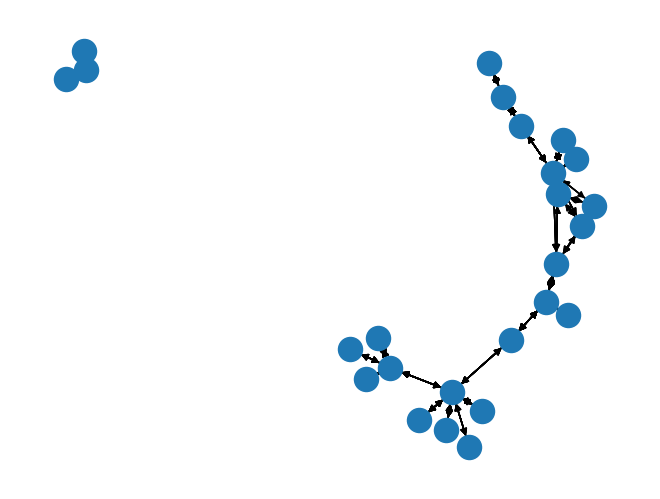

Signature:
nx.spring_layout(
    G,
    k=None,
    pos=None,
    fixed=None,
    iterations=50,
    threshold=0.0001,
    weight='weight',
    scale=1,
    center=None,
    dim=2,
    seed=None,
)
Docstring:
Position nodes using Fruchterman-Reingold force-directed algorithm.

The algorithm simulates a force-directed representation of the network
treating edges as springs holding nodes close, while treating nodes
as repelling objects, sometimes called an anti-gravity force.
Simulation continues until the positions are close to an equilibrium.

There are some hard-coded values: minimal distance between
nodes (0.01) and "temperature" of 0.1 to ensure nodes don't fly away.
During the simulation, `k` helps determine the distance between nodes,
though `scale` and `center` determine the size and place after
rescaling occurs at the end of the simulation.

Fixing some nodes doesn't allow them to move in the simulation.
It also turns off the rescaling feature at the simulation's end.
In additio

In [26]:
pos = nx.spring_layout(G, seed=10)
nx.draw(G, pos)
nx.spring_layout?

## 连通域分析

In [11]:
# 将G转为无向图，分析连通域
H = G.to_undirected()

In [12]:
for each in nx.connected_components(H):
    print('连通域')
    print(H.subgraph(each))
    print('包含节点')
    print(each)
    print('\n')

连通域
MultiGraph with 22 nodes and 304 edges
包含节点
{'Botvinnik, Mikhail M', 'Alekhine, Alexander A', 'Capablanca, Jose Raul', 'Petrosian, Tigran V', 'Tarrasch, Siegbert', 'Lasker, Emanuel', 'Gunsberg, Isidor A', 'Schlechter, Carl', 'Bronstein, David I', 'Keres, Paul', 'Reshevsky, Samuel H', 'Fischer, Robert J', 'Marshall, Frank J', 'Tal, Mikhail N', 'Chigorin, Mikhail I', 'Euwe, Max', 'Smyslov, Vassily V', 'Zukertort, Johannes H', 'Janowski, Dawid M', 'Steinitz, Wilhelm', 'Spassky, Boris V', 'Bogoljubow, Efim D'}


连通域
MultiGraph with 3 nodes and 49 edges
包含节点
{'Kasparov, Gary', 'Karpov, Anatoly', 'Korchnoi, Viktor L'}




## 高级可视化

In [13]:
# 将G转为无向-单连接图
H = nx.Graph(G)

In [14]:
H.edges()

EdgeView([('Zukertort, Johannes H', 'Steinitz, Wilhelm'), ('Steinitz, Wilhelm', 'Chigorin, Mikhail I'), ('Steinitz, Wilhelm', 'Gunsberg, Isidor A'), ('Steinitz, Wilhelm', 'Lasker, Emanuel'), ('Lasker, Emanuel', 'Marshall, Frank J'), ('Lasker, Emanuel', 'Tarrasch, Siegbert'), ('Lasker, Emanuel', 'Janowski, Dawid M'), ('Lasker, Emanuel', 'Schlechter, Carl'), ('Lasker, Emanuel', 'Capablanca, Jose Raul'), ('Capablanca, Jose Raul', 'Alekhine, Alexander A'), ('Alekhine, Alexander A', 'Bogoljubow, Efim D'), ('Alekhine, Alexander A', 'Euwe, Max'), ('Euwe, Max', 'Keres, Paul'), ('Euwe, Max', 'Smyslov, Vassily V'), ('Euwe, Max', 'Botvinnik, Mikhail M'), ('Euwe, Max', 'Reshevsky, Samuel H'), ('Keres, Paul', 'Smyslov, Vassily V'), ('Keres, Paul', 'Botvinnik, Mikhail M'), ('Keres, Paul', 'Reshevsky, Samuel H'), ('Smyslov, Vassily V', 'Reshevsky, Samuel H'), ('Smyslov, Vassily V', 'Botvinnik, Mikhail M'), ('Reshevsky, Samuel H', 'Botvinnik, Mikhail M'), ('Botvinnik, Mikhail M', 'Bronstein, David I')

In [15]:
# 两个棋手的所有棋局
len(G.get_edge_data('Zukertort, Johannes H', 'Steinitz, Wilhelm'))

10

In [16]:
# 两个棋手节点之间的 连接宽度 与 棋局个数 成正比
edgewidth = [len(G.get_edge_data(u, v)) for u, v in H.edges()]

In [17]:
edgewidth

[10,
 19,
 10,
 9,
 7,
 8,
 11,
 5,
 7,
 17,
 26,
 27,
 3,
 3,
 2,
 2,
 3,
 3,
 2,
 3,
 37,
 2,
 12,
 21,
 11,
 23,
 11,
 25,
 24]

In [18]:
# 棋手节点的大小 与 赢棋次数 成正比
wins = dict.fromkeys(G.nodes(), 0) # 生成每个棋手作为key的dict
for (u, v, d) in G.edges(data=True):
    r = d["Result"].split("-")
    if r[0] == "1":
        wins[u] += 1.0
    elif r[0] == "1/2":
        wins[u] += 0.5
        wins[v] += 0.5
    else:
        wins[v] += 1.0
nodesize = [wins[v] * 50 for v in H]

In [19]:
wins

{'Zukertort, Johannes H': 7.5,
 'Steinitz, Wilhelm': 53.0,
 'Chigorin, Mikhail I': 17.0,
 'Gunsberg, Isidor A': 8.5,
 'Lasker, Emanuel': 61.5,
 'Marshall, Frank J': 3.5,
 'Tarrasch, Siegbert': 5.5,
 'Janowski, Dawid M': 3.5,
 'Schlechter, Carl': 5.0,
 'Capablanca, Jose Raul': 24.5,
 'Alekhine, Alexander A': 79.5,
 'Bogoljubow, Efim D': 20.0,
 'Euwe, Max': 29.0,
 'Keres, Paul': 10.5,
 'Smyslov, Vassily V': 46.0,
 'Reshevsky, Samuel H': 10.5,
 'Botvinnik, Mikhail M': 89.0,
 'Bronstein, David I': 12.0,
 'Tal, Mikhail N': 20.5,
 'Petrosian, Tigran V': 35.5,
 'Spassky, Boris V': 32.5,
 'Fischer, Robert J': 12.5,
 'Korchnoi, Viktor L': 23.0,
 'Karpov, Anatoly': 52.0,
 'Kasparov, Gary': 23.0}

In [20]:
nodesize

[375.0,
 2650.0,
 850.0,
 425.0,
 3075.0,
 175.0,
 275.0,
 175.0,
 250.0,
 1225.0,
 3975.0,
 1000.0,
 1450.0,
 525.0,
 2300.0,
 525.0,
 4450.0,
 600.0,
 1025.0,
 1775.0,
 1625.0,
 625.0,
 1150.0,
 2600.0,
 1150.0]

In [21]:
# 布局
pos = nx.kamada_kawai_layout(H)

# 手动微调节点的横坐标（越大越靠右）、纵坐标（越大越靠下）
pos["Reshevsky, Samuel H"] += (0.05, -0.10)
pos["Botvinnik, Mikhail M"] += (0.03, -0.06)
pos["Smyslov, Vassily V"] += (0.05, -0.03)

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


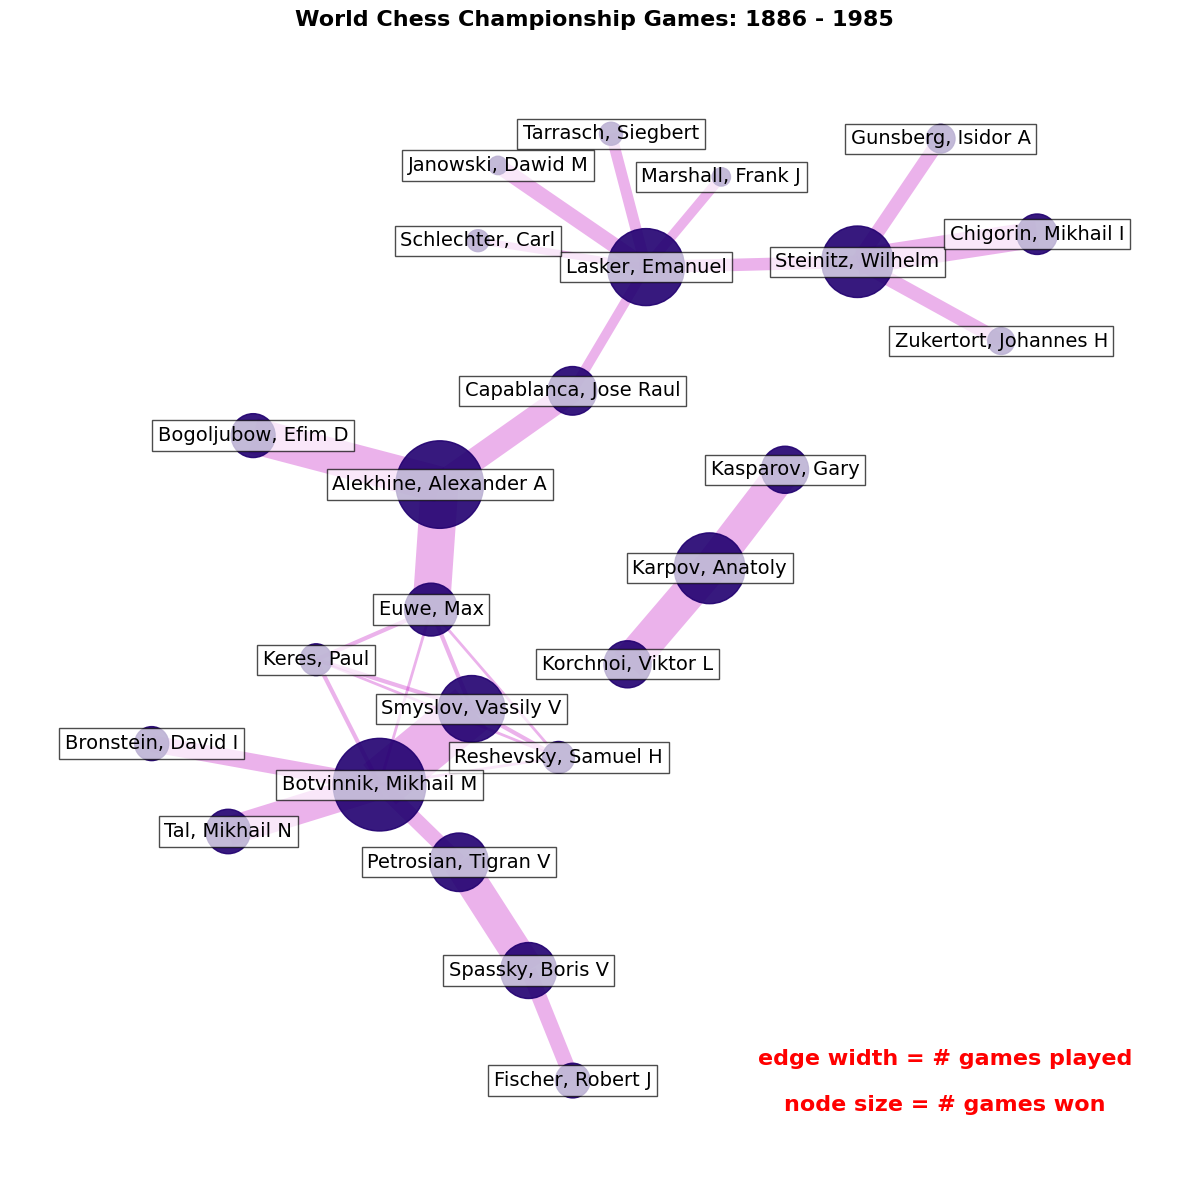

In [22]:
fig, ax = plt.subplots(figsize=(12, 12))

# 可视化连接
nx.draw_networkx_edges(H, pos, alpha=0.3, width=edgewidth, edge_color="m")

# 可视化节点
nx.draw_networkx_nodes(H, pos, node_size=nodesize, node_color="#210070", alpha=0.9)

# 节点名称文字说明
label_options = {"ec": "k", "fc": "white", "alpha": 0.7}
nx.draw_networkx_labels(H, pos, font_size=14, bbox=label_options)

# 标题和图例
font = {"fontname": "Helvetica", "color": "k", "fontweight": "bold", "fontsize": 16}
ax.set_title("World Chess Championship Games: 1886 - 1985", font)
# 图例字体颜色
font["color"] = "r"

# 文字说明
ax.text(
    0.80,
    0.10,
    "edge width = # games played",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)
ax.text(
    0.80,
    0.06,
    "node size = # games won",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)

# 调整图的大小，提高可读性
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.show()